In [143]:
import matplotlib.pyplot as plt
import numpy as np

N = 15 # Вариант

def variant_function(x: float) -> float: 
    return np.exp(- (x - (N/(N - 5)) ) ** 2 / 2) 

xs = np.linspace(1, 6, 6)
ys = [variant_function(xi) for xi in xs]
print('Значения исходной функции')
print(xs)
print(ys)




Значения исходной функции
[1. 2. 3. 4. 5. 6.]
[0.8824969025845955, 0.8824969025845955, 0.32465246735834974, 0.04393693362340742, 0.002187491118182885, 4.006529739295107e-05]


In [144]:
def cubic_spline_interpolation_my(xs, ys):
    n = len(xs) - 1  # количество точек
    h = np.diff(xs)  # вычисляем шаги между точками
    b = np.diff(ys) / h  # вычисляем угловые коэффициенты

    # инициализируем массивы для метода прогонки
    u = np.zeros(n)
    v = np.zeros(n)
    u[1] = 2 * (h[0] + h[1])
    v[1] = 6 * (b[1] - b[0])

    # прямой проход метода прогонки
    for i in range(2, n):
        u[i] = 2 * (h[i-1] + h[i]) - h[i-1]**2 / u[i-1]
        v[i] = 6 * (b[i] - b[i-1]) - h[i-1] * v[i-1] / u[i-1]

    # обратный проход метода прогонки
    m = np.zeros(n+1)
    m[n] = 0
    for i in range(n-1, 0, -1):
        m[i] = (v[i] - h[i] * m[i+1]) / u[i]

    coefficients = []
    for i in range(n):
        a = ys[i]
        b = (ys[i+1] - ys[i]) / h[i] - h[i] * (2 * m[i] + m[i+1]) / 6
        c = m[i] / 2
        d = (m[i+1] - m[i]) / (6 * h[i])
        coefficients.append((a, b, c, d))

    # функция для интерполяции в каждом отрезке
    def S(x, i):
        a, b, c, d = coefficients[i]
        t = x - xs[i]
        return a + b*t + c*t**2 + d*t**3

    return coefficients, S

coefficients, interpolated_function = cubic_spline_interpolation_my(xs, ys)

# Печать коэффициентов для каждого отрезка
for i, coeffs in enumerate(coefficients):
    print(f'Отрезок {i+1}: a={coeffs[0]}, b={coeffs[1]}, c={coeffs[2]}, d={coeffs[3]}')



Отрезок 1: a=0.8824969025845955, b=0.16497588299906638, c=0.0, d=-0.16497588299906638
Отрезок 2: a=0.8824969025845955, b=-0.3299517659981328, c=-0.49492764899719915, d=0.26703497976908624
Отрезок 3: a=0.32465246735834974, b=-0.5187021246852724, c=0.3061772903100595, d=-0.06819069935972936
Отрезок 4: a=0.04393693362340742, b=-0.11091964214434152, c=0.10160519223087142, d=-0.03243499259175444
Отрезок 5: a=0.002187491118182885, b=-0.005014235457861997, c=0.004300214455608096, d=-0.0014334048185360318


![](./блок-схема.png)

[0.00027594159474930713, 0.013344420517594657, 0.024701818606985726, 0.03433523980555053, 0.04224422743753886, 0.04844231463661597, 0.05295842268645323, 0.05583808327441442, 0.05714446345292967, 0.05695917536994721, 0.05538285649992081, 0.05253551009985258, 0.04855659984172278, 0.04360489693751601, 0.037858082476401766, 0.031512112034838946, 0.024780353800526123, 0.017892515375809603, 0.011093378008049215, 0.004641360155687946, 0.0011936243380739064, 0.006229041909721511, 0.010482413223197873, 0.01399137322517352, 0.016788738988860907, 0.018904399834885455, 0.020367181966427728, 0.02120666052748854, 0.021454893868385505, 0.021148057112433616, 0.02032795479401428, 0.019043395306220456, 0.017351413077178468, 0.015318327707350865, 0.013020632665416754, 0.010545709480115628, 0.007992366606783152, 0.005471205223512243, 0.0031048170641150286, 0.0010278219734611294, 0.0006162606523341108, 0.0017816562909294675, 0.002549058023308848, 0.0029971373352233877, 0.0031943462069094763, 0.003199577899

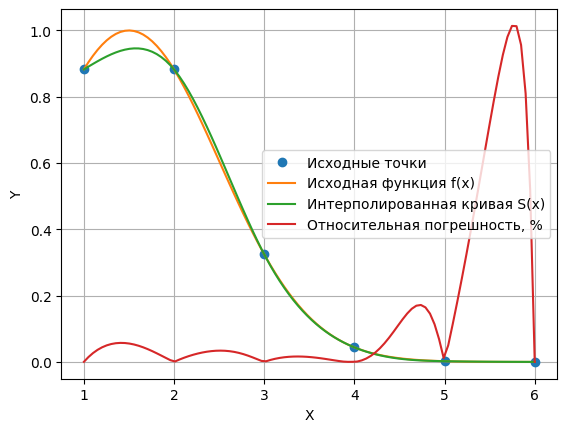

In [145]:
xs_plot = np.linspace(1 + 0.001, 6, 100)
ys_plot = [variant_function(x) for x in xs_plot]

xs_interp = np.linspace(1 + 0.001, 6, 100)
ys_interp = [interpolated_function(x, np.searchsorted(xs, x) - 1) for x in xs_interp]


abs_errs = [abs(ys_plot[i] - ys_interp[i]) for i in range(len(ys_plot))]
rel_errs = [abs(abs_errs[i] / ys_plot[i])  for i in range(len(ys_plot))]
square_diffs = [diff ** 2 for diff in abs_errs]

std_err = sum(square_diffs) / len(square_diffs) # среднеквадратическое отклонение

print(abs_errs)
print()
print(f"Среднеквадратическое отклонение: {std_err}")


plt.figure()
plt.plot(xs, ys, 'o', label='Исходные точки')
plt.plot(xs_plot, ys_plot, label='Исходная функция f(x)')
plt.plot(xs_interp, ys_interp, label='Интерполированная кривая S(x)')
plt.plot(xs_plot, rel_errs, label="Относительная погрешность, %")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
